# Final Project 

### By Zac Cross

# Pro Pokemon Tips that will Redefine Your Training

## Introduction:

I wanted to do my project on something a little more silly and uplifting since we are almost a year into this pandemic, so I chose Pokemon as my topic. My data set is a collection of Pokemon Stats from several of the DS video game series. I found it on kaggle.com, with the citation at the end of the notebook. In the data set, I have a list of over 700 pokemon, along with their primary and seocndary types, as well as all of their HP, attack, defense, speed, and special stats, as well as their legendary status and generation, so it is a pretty good mix of quantitative and qualitative data. 

In this project, I hope to explore some basic elements of the data. In the beginning, I will give a descriptive analysis of the total stats of every pokemon in the set. This is the sum off all of the quantitative data, so I think it will be a nice introduction to the set. Next, I will conduct a 2 Sample Mean test on the attack stats of fire and water type pokemon to see if Fire types have a larger attack stat. Since you have a choice between water, fire, and grass type starter pokemon, I think it would be helpful to match your playing style with the pokemon you choose (ie if you're more aggresive, you might want to go fire type). Finally, I will conclude a chi squared test to explore whether the occurence of legendary pokemon depends in some way on the generation of games. So, seeing if the proportion of legendary pokemon has stayed relatively constant over the generations or whether it varies in someway with the generation.   

##### Import Statements For Later

In [1]:
# Useful Imports
import numpy as np #For useful math stuff 
import pandas as pd #This is our data frame powerhouse
from scipy.stats import chi2_contingency #This is the package that generates an "expected" table
from scipy.stats import chi2 #This lets us access the distribution itself
import matplotlib.pyplot as plt #Lets us do some "sketching"
from scipy.stats import t, norm # The distributions that will help with hypothesis tests


##### Before Anything too Crazy, let's look at the data set

In [2]:
path = '~/Desktop/MATH 345/' # Path on my device
file = 'Pokemon.csv' # File Name
df = pd.read_csv(path + file) # Put all into a data frame
df # See what the data looks like

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Here's a Descriptive Statistic of the Total: 

Below you will find the code I used to make a descriptive analysis similar to what we did on the midterm and on the labs. I used a pandas data frame to make all of the computations relatively simple. I chose to do this on the total stats of each pokemon since those numbers represent the overall power and usefulness of a given pokemon. In that sense, if a pokemon has a high total stat, it does not give insight into how powerful any given stat is, but does tell you generally if it is a good or unuseful. So, below you will see a general spread of how 'good' the pokemon are. Notice, that by looking at the histogram, the data looks fairly normal and symmetric looking, but is pretty spread out. Refer to the print statements below for the stats.

Descriptive Stats of Total Stats:

Mean = 435.1025, Standard Deviation = 119.963039755519, Variance = 14391.130907384233

5 Number Summary:
Min = 180
1st Quartile = 330.0
Median = 450.0
3rd Quartile = 515.0
Max = 780
IQR = 185.0



Histogram of Data with 100 Bins:


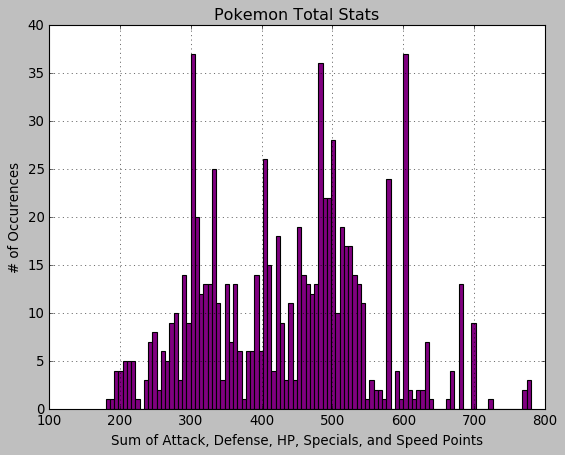

In [3]:
# Make a total sub - dataframe
total_frame = df['Total']
print("Descriptive Stats of Total Stats:")

# Usual Necessary Stats
total_mean = total_frame.mean()
total_std = total_frame.std()
total_var = total_std ** 2
print(f"\nMean = {total_mean}, Standard Deviation = {total_std}, Variance = {total_var}")

#5 Number Summary
total_min = total_frame.min()
total_q1 = total_frame.quantile(.25)
total_median = total_frame.quantile(.5)
total_q3 = total_frame.quantile(.75)
total_max = total_frame.max()
total_iqr = total_q3 - total_q1
print(f"\n5 Number Summary:")
print(f"Min = {total_min}")
print(f"1st Quartile = {total_q1}")
print(f"Median = {total_median}")
print(f"3rd Quartile = {total_q3}")
print(f"Max = {total_max}")
print(f"IQR = {total_iqr}")

# Make a histogram
print("\n\n\nHistogram of Data with 100 Bins:")
plt.style.use('classic')
total_frame.hist(bins=100, color = 'purple')
plt.title('Pokemon Total Stats')
plt.xlabel('Sum of Attack, Defense, HP, Specials, and Speed Points')
plt.ylabel('# of Occurences')
plt.show()



## Check too see if I can do a Chi Squared Test on Legendary Status vs Type 1

In [4]:
incidence = pd.crosstab(df['Legendary'], df['Type 1']) # Let's look at the 2 columns' incidence table
incidence

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Legendary,,,,,,,,,,,,,,,,,,
False,69,29,20,40,16,27,47,2,30,67,28,22,96,28,43,40,23,108
True,0,2,12,4,1,0,5,2,2,3,4,2,2,0,14,4,4,4


#### Since we have a bunch of cells with values less than 5, we cannot do this test.

## Test 1: Test of 2 Sample Means for Attack Stats between Fire and Water types:

In this test I will compare the average attack stats of fire type and water type pokemon. This test is useful because every game gives the player a choice of a fire, water, or grass type starter pokemon. This pokemon is typically the most heavily trained and used in the game, since you immediately begin leveling them up and grow attatched. Knowing if there's a difference between the types' attack stats may inform a player in how to choose a pokemon to best match their playing style. However, note that I do not like grass type pokemon very much (sorry bulbasaur), and we have only dealt with 2 sample tests, so I will only consider water and fire types with this test. The 2 Sample Mean test is the best choice in this instance because I cannot use matched pair for the types in general, this is not categorical data, and I have no insight into the population parameters ahead of time. I prefer fire type pokemon because they are typically cuter than water types in my opinion so I will work with the alternative hypothesis that the average fire attack stat is higher than water's. This makes my null hypothesis that the water average attack is equal or greater than fire's.   


Below is my code for the test. I primarily make use of pandas' dataframes and methods to carry out my computations, though I also use numpy and scipy for others, and I use matplotlib.pyplot for all of the sketching. There were a lot of numbers involved in this test so I tried to get all of the useful stats from each type of pokemon using Data frame methods and then used those in the test calculations. I end with a sketch of the t curve with the p-value shaded, following the code used in class plots pretty carefully. 

Doing this test, I found sufficient evidence at the 5% level to suggest that the average fire attack stat is higher than that of water. I chose to conduct the test at the alpha = 0.05 level since nothing here is consequential to human health. Since I found a p value of less than 0.02, I can confidently reject the null hypothesis.

Part 1 
Water Stats:
Sample Mean: 74.15178571428571, STD: 28.37719228231612, Sample Size: 112

Fire Stats:
Sample Mean: 84.76923076923077, STD: 28.769275130832632, Sample Size: 52


Part 2
The Sample Dif: 10.617445054945065, the Standard Error = 4.806934587511129

The dof = 98.2687050705494
The T_score is: 2.2087766874403063
The p value is: 0.014756930726323225



Part 3: Sketching:



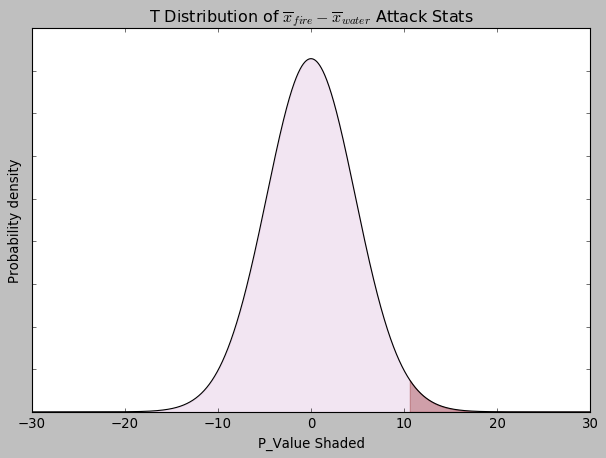

In [5]:
# steps 1 set up data frames to get my stats:
water_frame = df.loc[df['Type 1'] == 'Water'] #Start with Water. Get df of only water type
water_attack = water_frame['Attack'] #Now hone into just the attack column

water_mean = water_attack.mean() #Get usual necessary data
water_std = water_attack.std()
water_size = len(water_attack)

print(f"Part 1 \nWater Stats:")
print(f"Sample Mean: {water_mean}, STD: {water_std}, Sample Size: {water_size}")


fire_frame = df.loc[df['Type 1'] == 'Fire'] #repeat with fire type
fire_attack = fire_frame['Attack']

fire_mean = fire_attack.mean() #Get usual necessary data
fire_std = fire_attack.std()
fire_size = len(fire_attack)

print(f"\nFire Stats:")
print(f"Sample Mean: {fire_mean}, STD: {fire_std}, Sample Size: {fire_size}")

##############################################################################################################
# Part 2 Now onto the test:
# find the sample dif, and SE 
null_mu = 0
sample_diff = fire_mean - water_mean
SE = np.sqrt(((water_std**2) / water_size) + ((fire_std**2) / fire_size))

print(f"\n\nPart 2\nThe Sample Dif: {sample_diff}, the Standard Error = {SE}")

# degrees of freedom:
p2 = (fire_std**4)/((fire_size**2) * (fire_size - 1))
p1 = (water_std**4)/((water_size**2) * (water_size - 1))
se = SE ** 4

deg_free =  se/(p1 + p2)
print(f"\nThe dof = {deg_free}")

# Test Stat: T_score
t_score = (sample_diff - null_mu)/SE
print(f"The T_score is: {t_score}")

#Find the P Val: 1 sided test
p = (1-t.cdf(t_score, deg_free)) #Since t is positive we use survival fcn
print(f"The p value is: {p}")


##############################################################################################################
#Part 3 Sketch: Using my own tweak on Eric's Code from HYpTestEx.ipynb
print("\n\n\nPart 3: Sketching:\n")
plt.style.use('classic')

x_range = np.arange(sample_diff,30, .01) #P Value Shading
x_all = np.arange(-30,30, .01) # Entire Domain



y2 = t.pdf(x_all,deg_free, null_mu, SE)
y3 = t.pdf(x_range,deg_free,null_mu,SE)
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(x_all,y2, 'black')


ax.fill_between(x_all,y2,0, alpha=0.1, color='purple')
ax.fill_between(x_range,y3,0, alpha=0.3, color='maroon')
ax.set_xlim([-30,30])
ax.set_xlabel('P_Value Shaded')
ax.set_ylabel('Probability density')

ax.set_yticklabels([])

ax.set_title(r'T Distribution of $\overline{x}_{fire} - \overline{x}_{water}$ Attack Stats')

plt.show()

### Test 1 In Appendix E Format:

##### a.)  $H_0$: $\overline{x}_{fire} \leq \overline{x}_{water}$
##### b.)  $H_0$: $\overline{x}_{fire} > \overline{x}_{water}$
##### c.) The Random variable $\overline{x}_{fire} - \overline{x}_{water}$ represents the difference in mean attack stats between fire and water type pokemon.
##### d.) In this test, we will use a T distribution with 98.27 degrees of freedom. 
##### e.) The Test statistic is the t-score of: $t = 2.209$.
##### f.) I found the P value to be: $p = 0.014757$.  In context, this means that the probability of getting a sample mean difference of 10.62 or higher given our sample is about 1.4757%. 
##### g.) Refer to the sketch above.
##### h.) (i.) Alpha = 0.05 since this is no matter of life and death. (ii.) Reject the Null Hypothesis. (iii.) Reject the Null Hypothesis because our p-value is less than alpha. (iv.) In conclusion, we have found that their is sufficient evidence to reject the null hypothesis. This means that the population mean attack stats of fire type pokemon is most likely higher than that of water type. 
##### i.) I decided to use a t-distribution, since I was comparing 2 sample means. Since I have no insight to any of the population parameters, and this was not a binomial problem, I had to use the t distribution.

## Test 2: Chi Squared Test of Indepence for Generation and Proportion of Legendary Pokemon

In this test, I will use the Chi Squared distribution to test for dependence between the proportion of legendary pokemon on the geneartion of the game. I want to do this test to have a beginning probe into whether the pokemon video games's use of legendary pokemon is changing. In the game, legendary pokemon are some of the coolest and most powerful ones to catch, and it could be useful to know if they are becoming more or less rare as the game goes on. However, just in this sample there are 6 different generations, so it would be a pain to just blindly conduct proportion tests, so I will start with a Chi Squared test of independence. This test will not give me any insight beyond identifying or rejecting some sort of dependence between the two categories, but if it rejects dependence, then I have saved a lot of time and effort.

Below you can see the code necessary to conduct the test. I again used pandas' DataFrames to make life easier. However, unlike the 2 sample mean test above, between pandas and scipy's chi functions, I had to do realtively little to conduct the test. My main job was to use pd.crosstab to make an incidence table, and then let chi2_contigency roll from there. This is a great example of how useful python can be to do these kinds of tests. From there, I just had to print out values to put in the form below and sketch the distribution and p value. The sketch code and use of pandas is all based on the chi squared python class example. 

Doing this test, I found insufficient evidence at the 5% level to suggest some sort of dependence between the proportion of legendary pokemon and the generation of the game. Since nothing in this project deals with anything consequential to human health or well-being, an alpha of 0.05 seems appropriate. With a P-Value of over 0.07, I could not reject the null hypothesis of independence, though that p-value is low enough to warrant possible other inquires. For the test in Appendix E format, refer to the markdown cell below. 



In [6]:
incidence = pd.crosstab(df['Legendary'], df['Generation'])
incidence

Generation,1,2,3,4,5,6
Legendary,,,,,,
False,160,101,142,108,150,74
True,6,5,18,13,15,8


We have at least 5 in each cell so we can do this test!

The Test Stats: Chi Squared = 9.876762790563932
The Degrees of Freedom = 5
The P Value = 0.07880338189674693


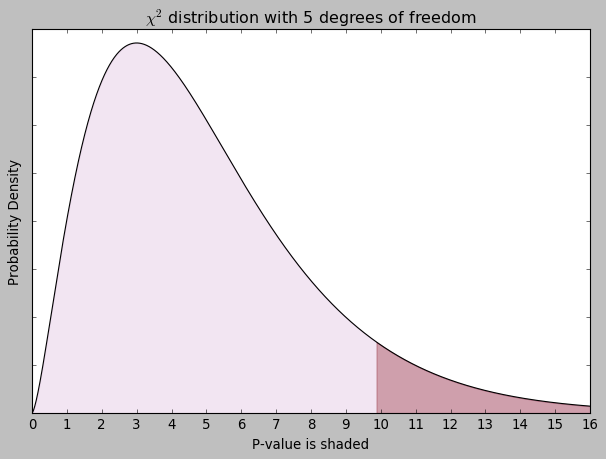

In [7]:
# Chi Squared test:
test_table = pd.crosstab(df['Legendary'], df['Generation']) # set up my table
chi, p_val, dof, table_expected=chi2_contingency(test_table)

print(f"The Test Stats: Chi Squared = {chi}")
print(f"The Degrees of Freedom = {dof}")
print(f"The P Value = {p_val}")

############################################################################################
#Sketch

x_range = np.arange(chi, 17, 0.01) #this is what we're going to shade under
x_all = np.arange(0,17, 0.01) # entire range of p_A-p_B, centered at 0 per H_0

y = chi2.pdf(x_range,dof) #graph above p-val
y2 = chi2.pdf(x_all,dof) #graph above whole thing
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_all,y2, color='black')

ax.fill_between(x_range,y,0, alpha=0.3, color='maroon')
ax.fill_between(x_all,y2,0, alpha=0.1, color = 'purple')
ax.set_xlim([0,15])
ax.set_xlabel('P-value is shaded')
ax.set_ylabel('Probability Density')
ax.set_xticks([i for i in range(0,17)])
ax.set_yticklabels([])

ax.set_title(r'$\chi^2$ distribution with 5 degrees of freedom')

plt.show()



In [10]:
# Just for kicks, lets look at incidence and expected tables:
print(incidence)
table_expected

Generation    1    2    3    4    5   6
Legendary                              
False       160  101  142  108  150  74
True          6    5   18   13   15   8


array([[152.5125 ,  97.3875 , 147.     , 111.16875, 151.59375,  75.3375 ],
       [ 13.4875 ,   8.6125 ,  13.     ,   9.83125,  13.40625,   6.6625 ]])

### Test 2 in Appendix E Format:

##### a.)  $H_0$: The generation and proportion of legendary pokemon available are independent of one another.

##### b.)  $H_a$: The generation and proportion of legendary pokemon available are dependently related in some way.

##### c.) 
The degrees of freedom is given by: dof = (m-1) x (n-1) where m is the # of columns and n is the # of rows. So, there are 5 degrees of freedom.

##### d.) 
We will use a Chi Squared distribution with 5 degrees of freedom since I am doing a test on a table of proportions, and it is a test of independence.

##### e.) The test statistic $\chi^2 = 9.8768$.

##### f.) 
From above, the p value is: $p = 0.0788$. This means that the probability of getting a sample table with a deviation from the expected table with a $\chi^2$ value of 9.8768 or higher is about 7.88%. So, we would expect to get a sample table of legendary pokemon status in each generation as varied as our data or more roughly 7.88% of the time. 

##### g.) Refer to the sketch above.

##### h.)
(i) Let alpha be 0.05 since this is not a very life or death situation. (ii) We will choose to not reject the null hypothesis. (iii.) We will not reject the null hypothesis, because our p value is greater than alpha, so it does not warrant rejecting the null hypothesis at the 5 % level.  (iv.) In conclusion, we have not found sufficient evidnce to reject the null hypothesis, since our p value is greater than 0.05. This suggest that the proportion of legendary pokemon is independent of the generation of game. 

## Project Conclusion:

In this project I gave a descriptive analysis of the total stat points for pokemon in my data set, I tested if fire type pokemon have a higher average attack stat than water type, and I tested for independence between generation number and the proportion of legendary status pokemon. 

At the end of my 2 sample mean test, I found that I had sufficient evidence to suggest that fire type pokemon have a higher average attack stat than water type. This means that with 95% confidence, players who want to focus on pokemon with higher attack stats should consider using fire types. 

For my chi squared test of independence, I found that I had insufficient evidence to suggest dependence between the proportion of legendary pokemon and generation of the games. This means that at the 5% level, there is no apparent relationship between the generation of the game and the proportion of legendary pokemon. So, if you are a player after legendary pokemon, there is no apaprent advantage to any particular generation of game. 

Both of these tests, while interesting, only scratch the surface of what can be do with my data set, and with pokemon data in general. With more data, one could how proportions of different types of pokemon evolve ( or do not evolve) over time using all of the stats available. One could also look into how the legendary pokemon are ditributed over the various types, and use that knowledge to know what pokemon to train to have the best chances of catching them. So, in the end there are a lot of future interesting ways to look at this data, let alone looking at the data sets of all the card games, video games, apps, etc. 

This project also shows off some of the highlights of the python code we have learned this quarter. Pandas DataFrames are some of the most versatile and useful tools I will take from this class. Between organizing data and getting all fo the useful descriptive statistics, as well as plotting, pd.DataFrame() is a powerful function, as may be apparent from it's heavy use in this project. I also used a lot of scipy.stats modules for the t and chi squared distributions, which will be useful as I need to use more statistics in my physics research. 


## Sources:

I found this data set on kaggle.com at [this link](https://www.kaggle.com/abcsds/pokemon) .
The dataset was created by Alberto Barradas for stats class examples. 

Also, the code found here is heavily based off of the python note books provided in lecture and labs throughout the quarter, so a big thank you to Eric Merchant and Nicu Istrate for all of the hard work and help this Winter!